In [8]:
%matplotlib inline

import lsqfit
from model_avg_paper import *
from model_avg_paper.test_tmin import test_vary_tmin_SE

In [9]:
p0_test_ME = {
    'A0': 2.0,
    'E0': 0.8,
    'A1': 10.4,
    'E1': 1.16,
}
Nt = 32
noise_params = {
    'noise_amp': 0.3,
    'noise_samples': 500,
    'frac_noise': True,
    'cross_val': False,
    'cv_frac': 0.1,
}
obs_name='E0'

correlated_data = True
rho=0.6

# Set seed for consistency of outcome
#np.random.seed(10911)  # Fig 3, subfig A; Fig 4
#np.random.seed(81890)  # Fig 3, subfig B
#np.random.seed(87414)  # Fig 3, subfig C
np.random.seed(77700)  # Fig 3, subfig D


def ME_model(x,p):
    return multi_exp_model(x,p,Nexc=2)

In [10]:
if correlated_data:
    test_data = gen_synth_data_corr(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        rho=rho,
        **noise_params)
else:
    test_data = gen_synth_data(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        **noise_params)

In [15]:
test_data.keys()

dict_keys(['t', 'yexact', 'y', 'yraw', 'ND'])

In [16]:
test_data['t']

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [17]:
test_data['yexact']

array([1.24000000e+01, 4.15891421e+00, 1.42583833e+00, 5.01832981e-01,
       1.81964463e-01, 6.81178471e-02, 2.63300985e-02, 1.04900255e-02,
       4.29313423e-03, 1.79725938e-03, 7.66252568e-04, 3.31349945e-04,
       1.44825630e-04, 6.38017537e-05, 2.82690345e-05, 1.25770334e-05,
       5.61201997e-06, 2.50935277e-06, 1.12367202e-06, 5.03690570e-07,
       2.25944128e-07, 1.01404544e-07, 4.55267892e-08, 2.04448403e-08,
       9.18280218e-09, 4.12495266e-09, 1.85310134e-09, 8.32539453e-10,
       3.74048774e-10, 1.68059877e-10, 7.55107000e-11, 3.39280566e-11])

In [18]:
test_data['y']

array([12.37(16), 4.111(55), 1.395(19), 0.5003(64), 0.1809(23),
       0.06664(91), 0.02607(36), 0.01047(14), 0.004311(60), 0.001829(24),
       0.000773(11), 0.0003318(46), 0.0001449(20), 0.00006448(80),
       0.00002790(39), 0.00001231(17), 5.546(74)e-06, 2.511(32)e-06,
       1.138(15)e-06, 5.113(68)e-07, 2.292(30)e-07, 1.008(14)e-07,
       4.514(65)e-08, 2.023(27)e-08, 9.11(11)e-09, 4.132(54)e-09,
       1.878(25)e-09, 8.42(11)e-10, 3.752(50)e-10, 1.697(22)e-10,
       7.69(11)e-11, 3.466(48)e-11], dtype=object)

In [19]:
test_data['yraw']

array([[7.88731855e+00, 1.12934553e+00, 1.04757622e+00, ...,
        1.61248699e-10, 1.00609177e-10, 5.17798162e-11],
       [7.31118988e+00, 2.56266607e+00, 5.75324115e-01, ...,
        2.83938914e-10, 8.67890783e-11, 2.86065729e-11],
       [9.77178977e+00, 3.56213516e+00, 1.11234334e+00, ...,
        1.38712375e-10, 6.21639459e-11, 3.61905471e-11],
       ...,
       [1.81004311e+01, 5.32609710e+00, 1.42611615e+00, ...,
        2.58473206e-10, 6.26003257e-11, 2.41086209e-11],
       [6.99531539e+00, 3.48731629e+00, 1.46920207e+00, ...,
        1.98854014e-10, 9.10767455e-11, 3.24155717e-11],
       [1.56825735e+01, 4.58944866e+00, 1.10622154e+00, ...,
        2.19684463e-10, 8.54511703e-11, 2.69964779e-11]])

In [20]:
test_data['ND']

500

In [21]:
test_data[0]

KeyError: 0

In [24]:
test_res = test_vary_tmin_SE(test_data, Nt=Nt, max_tmin=26, obs_name=obs_name, IC='AIC')
                             #cross_val=noise_params['cross_val'])
print(test_res['obs_avg'])

0.7995(12)


Text(0, 0.5, 'p')

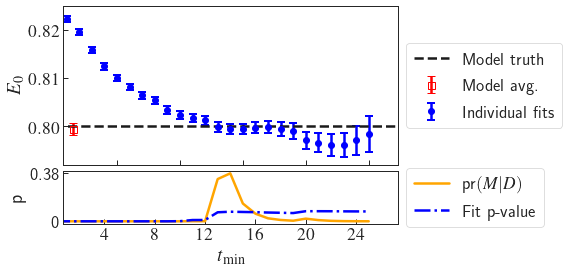

In [5]:
## Figure 3

import matplotlib.ticker as ticker

gs = plt.GridSpec(2, 1, height_ratios=[3,1])
gs.update(hspace=0.06)

ax1 = plt.subplot(gs[0])

plot_gvcorr([test_res['obs_avg']], x=np.array([1.5]), color='red', markersize=7, marker='s', open_symbol=True, label='Model avg.')
plot_gvcorr(test_res['obs'], x=test_res['tmin'], label='Individual fits')

ax1.plot(np.array([-1,34]), 0*np.array([0,0])+p0_test_ME[obs_name], linestyle='--', color='k', label='Model truth')
#ax1.set_xlabel('$N_p$')
ax1.set_ylabel('$E_0$')

ax1.legend(loc='center left', bbox_to_anchor=(1,0.5))
ax1.set_xlim(0.7,27.3)

plt.setp(ax1.get_xticklabels(), visible=False)

ax2 = plt.subplot(gs[1])

p_norm = test_res['probs'] / np.sum(test_res['probs'])
Q_norm = test_res['Qs'] / np.sum(test_res['Qs'])
plt.plot(test_res['tmin'], p_norm, color='orange', label='pr$(M|D)$')
plt.plot(test_res['tmin'], Q_norm, color='blue', linestyle='-.', label='Fit p-value')  # Note: fit prob != model prob! 

tick_spacing = 4
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.yticks([0,np.max(p_norm)])
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '0' if x == 0 else '{:.2f}'.format(x)))
ax2.set_xlim(0.7,27.3)




# Put a legend to the right of the current axis
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.set_xlabel(r'$t_{\rm min}$')
ax2.set_ylabel('p')

# Uncomment to save figure to disk
#plt.savefig('plots/exp_avg_4.pdf', bbox_inches = "tight")


In [6]:
# Scaling w/number of samples
Nsamp_array = np.array([20, 40, 80, 160, 320, 640, 2040, 4096, 4096*2, 4096*4])
Nsamp_max = Nsamp_array[-1]

noise_params['noise_samples'] = Nsamp_max
if correlated_data:
    scale_data = gen_synth_data_corr(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        rho=rho,
        **noise_params)    
else:
    scale_data = gen_synth_data(
        np.arange(0,Nt), 
        p0_test_ME, 
        ME_model,
        **noise_params)

model_avg_vs_Nsamp = []
naive_avg_vs_Nsamp = []
fixed_tmin_vs_Nsamp = []
fixed_tmin_2_vs_Nsamp = []
fw_vs_Nsamp = []

fix_tmin = 14
fix_tmin_2 = 8


for Nsamp in Nsamp_array:
    test_data_scale = cut_synth_data_Nsamp(scale_data, Nsamp)
    test_res_scale = test_vary_tmin_SE(test_data_scale, Nt=Nt, max_tmin=Nt-4, obs_name=obs_name, IC='AIC')
    test_res_scale_naive = test_vary_tmin_SE(test_data_scale, Nt=Nt, max_tmin=Nt-4, obs_name=obs_name, 
                                             IC='naive')                                             
    
    model_avg_vs_Nsamp.append(test_res_scale['obs_avg'])
    naive_avg_vs_Nsamp.append(test_res_scale_naive['obs_avg'])
    fixed_tmin_vs_Nsamp.append(test_res_scale['obs'][fix_tmin])
    fixed_tmin_2_vs_Nsamp.append(test_res_scale['obs'][fix_tmin_2])
    fw_vs_Nsamp.append(obs_avg_full_width(test_res_scale['obs'], test_res_scale['Qs'], test_res_scale['fits'], bf_i=None))






/tmp/ipykernel_95676/373519976.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


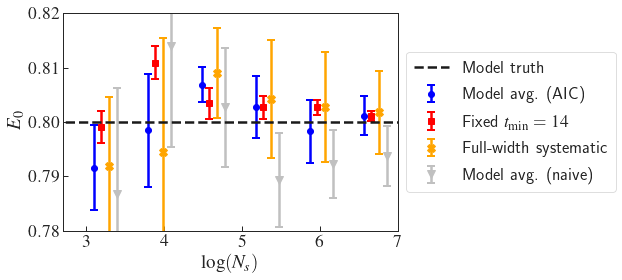

In [7]:
## Figure 4

plot_gvcorr(model_avg_vs_Nsamp, x=np.log(Nsamp_array)+0.1, label='Model avg. (AIC)')
plot_gvcorr(fixed_tmin_vs_Nsamp, x=np.log(Nsamp_array)+0.2, color='red', marker='s', markersize=6, label=r'Fixed $t_{\rm min} = 14$')
plot_gvcorr(fw_vs_Nsamp, x=np.log(Nsamp_array)+0.3, marker='X', markersize=8, color='orange', label='Full-width systematic')
plot_gvcorr(naive_avg_vs_Nsamp, x=np.log(Nsamp_array)+0.4, color='silver', marker='v', markersize=8, label=r'Model avg. (naive)')

plt.plot(np.arange(0,10), 0*np.arange(0,10)+p0_test_ME[obs_name], linestyle='--', color='k', label='Model truth')
plt.xlabel(r'$\log(N_s)$')
plt.ylabel(r'$E_0$')
plt.xlim(2.7,7.)
plt.ylim(0.78,0.82)


# Put a legend to the right of the current axis
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Uncomment to save figure to disk
#plt.savefig('plots/exp_N_scaling.pdf', bbox_inches = "tight")
